In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from sklearn.datasets import  fetch_california_housing
california_data = fetch_california_housing(as_frame=True)
cal = california_data.data
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [7]:
target_data = california_data.target
target_data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: MedHouseVal
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [8]:
data = california_data.frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: xlabel='Latitude', ylabel='Longitude'>

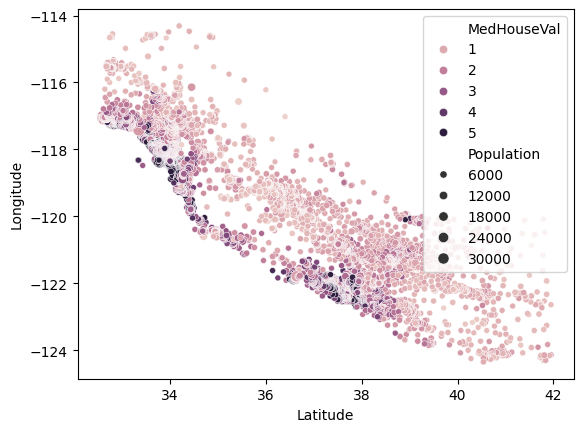

In [13]:
sns.scatterplot(
    x=data['Latitude'],
    y=data['Longitude'],
    hue=data['MedHouseVal'],
    size=data['Population']
)

In [12]:
numercic_columns = data.select_dtypes(include=np.number).columns.tolist()
numercic_columns

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']

In [15]:
import pandas as pd
import numpy as np

def check_outliers_detailed(df):
    report_data = []
    

    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
 
        outlier_rows = df[(df[col] < lower) | (df[col] > upper)]
        count = len(outlier_rows)
        

        report_data.append({
            "Column": col,
            "Outlier Count": count,
            "Lower Bound": lower,
            "Upper Bound": upper,
            "Min Value": df[col].min(),
            "Max Value": df[col].max()
        })
    

    outlier_df = pd.DataFrame(report_data)
    return outlier_df


outlier_report = check_outliers_detailed(data)
outlier_report



,Column,Outlier Count,Lower Bound,Upper Bound,Min Value,Max Value
0,MedInc,681,-0.706375,8.013025,0.499900,15.000100
1,HouseAge,0,-10.500000,65.500000,1.000000,52.000000
2,AveRooms,511,2.023219,8.469878,0.846154,141.909091
3,AveBedrms,1424,0.865909,1.239697,0.333333,34.066667
4,Population,1196,-620.000000,3132.000000,3.000000,35682.000000
5,AveOccup,711,1.150961,4.561041,0.692308,1243.333333
6,Latitude,0,28.260000,43.380000,32.540000,41.950000
7,Longitude,0,-127.485000,-112.325000,-124.350000,-114.310000
8,MedHouseVal,1071,-0.980875,4.824125,0.149990,5.000010


<Axes: >

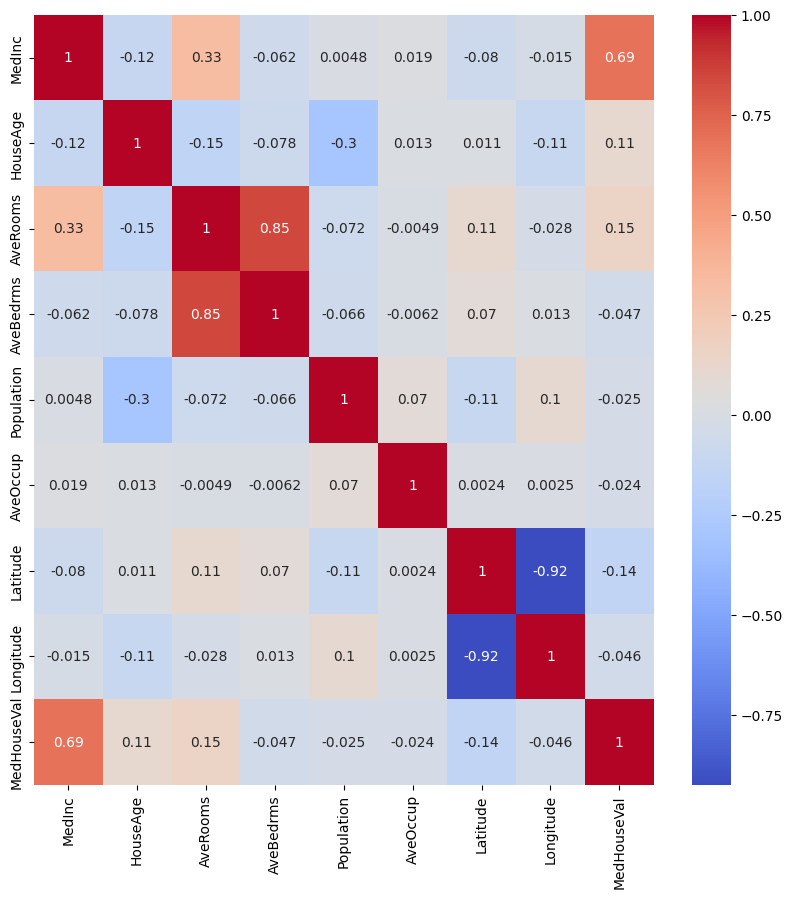

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')